In [9]:
import pickle
import torch
import matplotlib.pyplot as plt
import math
import matplotlib



In [2]:
with open(r"train.pkl", "rb") as output_file:
    t_train, x_train, true_param_train = pickle.load(output_file)
with open(r"valid.pkl", "rb") as output_file:
    t_valid, x_valid, true_param_valid = pickle.load(output_file)
with open(r"test_shifted.pkl", "rb") as output_file:
    t_test_shifted, x_test_shifted, true_param_test_shifted = pickle.load(output_file)

In [3]:
frequency = 1 / t_train[1]

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")




font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 80}

matplotlib.rc('font', **font)
sns.set(font_scale=4)

In [49]:
def get_omega(x):
    dx, dy = x[:, 0, :], x[:, 2, :]
    diff = (dx - dy).unsqueeze(2)
    choices = torch.cat((diff - 2 * math.pi, diff, diff + 2 * math.pi), 2)
    _, choice = torch.min(choices ** 2, 2)  # np.arctan2(np.sin(x-y), np.cos(x-y)) * 200
    omegas = torch.gather(choices, dim=2, index=choice.unsqueeze(2)).squeeze(2) * frequency / 2
    return omegas
def draw_speed_dist(x_train, x_test, x_valid):
    omegas_train = get_omega(x_train)
    omegas_test = get_omega(x_test)
    omegas_valid = get_omega(x_valid)
    plt.figure(figsize=(50, 20))
    
    plt.subplot(1, 4, 1)
    plt.xlim(xmin=-3, xmax=3)    
    plt.title("$\\theta_1$")
    plt.hist(x_train[:, 1, :].permute(1, 0)[[0]], bins=40, label=["Train"], histtype="stepfilled", alpha=.3, density=True)
    plt.hist(x_valid[:, 1, :].permute(1, 0)[[0]], bins=40, label=["Valid"], histtype="stepfilled", alpha=.3, density=True)
    plt.hist(x_test[:, 1, :].permute(1, 0)[[0]], bins=40, label=["Test"], histtype="stepfilled", alpha=.3, density=True)
    plt.legend(fontsize=45)
    
    plt.subplot(1, 4, 2)
    plt.title("$\\theta_2$")
    plt.xlim(xmin=-3, xmax=3)
    plt.hist(x_train[:, 1, :].permute(1, 0)[[1]], bins=40, label=["Train"], histtype="stepfilled", alpha=.3, density=True)
    plt.hist(x_valid[:, 1, :].permute(1, 0)[[1]], bins=40, label=["Valid"], histtype="stepfilled", alpha=.3, density=True)
    plt.hist(x_test[:, 1, :].permute(1, 0)[[1]], bins=40, label=["Test"], histtype="stepfilled", alpha=.3, density=True)
    #plt.legend()
    
    plt.subplot(1, 4, 3)
    plt.xlim(xmin=-25, xmax=25)    
    plt.title("$\\dot \\theta_1$")
    plt.hist(omegas_train.permute(1, 0)[[0]], bins=40, label=["Train"], histtype="stepfilled", alpha=.3, density=True)
    plt.hist(omegas_valid.permute(1, 0)[[0]], bins=40, label=["Valid"], histtype="stepfilled", alpha=.3, density=True)
    plt.hist(omegas_test.permute(1, 0)[[0]], bins=40, label=["Test"], histtype="stepfilled", alpha=.3, density=True)
    #plt.legend()
    
    plt.subplot(1, 4, 4)
    plt.title("$\\dot \\theta_2$")
    plt.xlim(xmin=-50, xmax=70)
    plt.hist(omegas_train.permute(1, 0)[[1]], bins=40, label=["Train"], histtype="stepfilled", alpha=.3, density=True)
    plt.hist(omegas_valid.permute(1, 0)[[1]], bins=40, label=["Valid"], histtype="stepfilled", alpha=.3, density=True)
    plt.hist(omegas_test.permute(1, 0)[[1]], bins=40, label=["Test"], histtype="stepfilled", alpha=.3, density=True)
    #plt.legend()
    
    plt.savefig('distribution_shift.png', dpi=100, bbox_inches = 'tight')
    
    

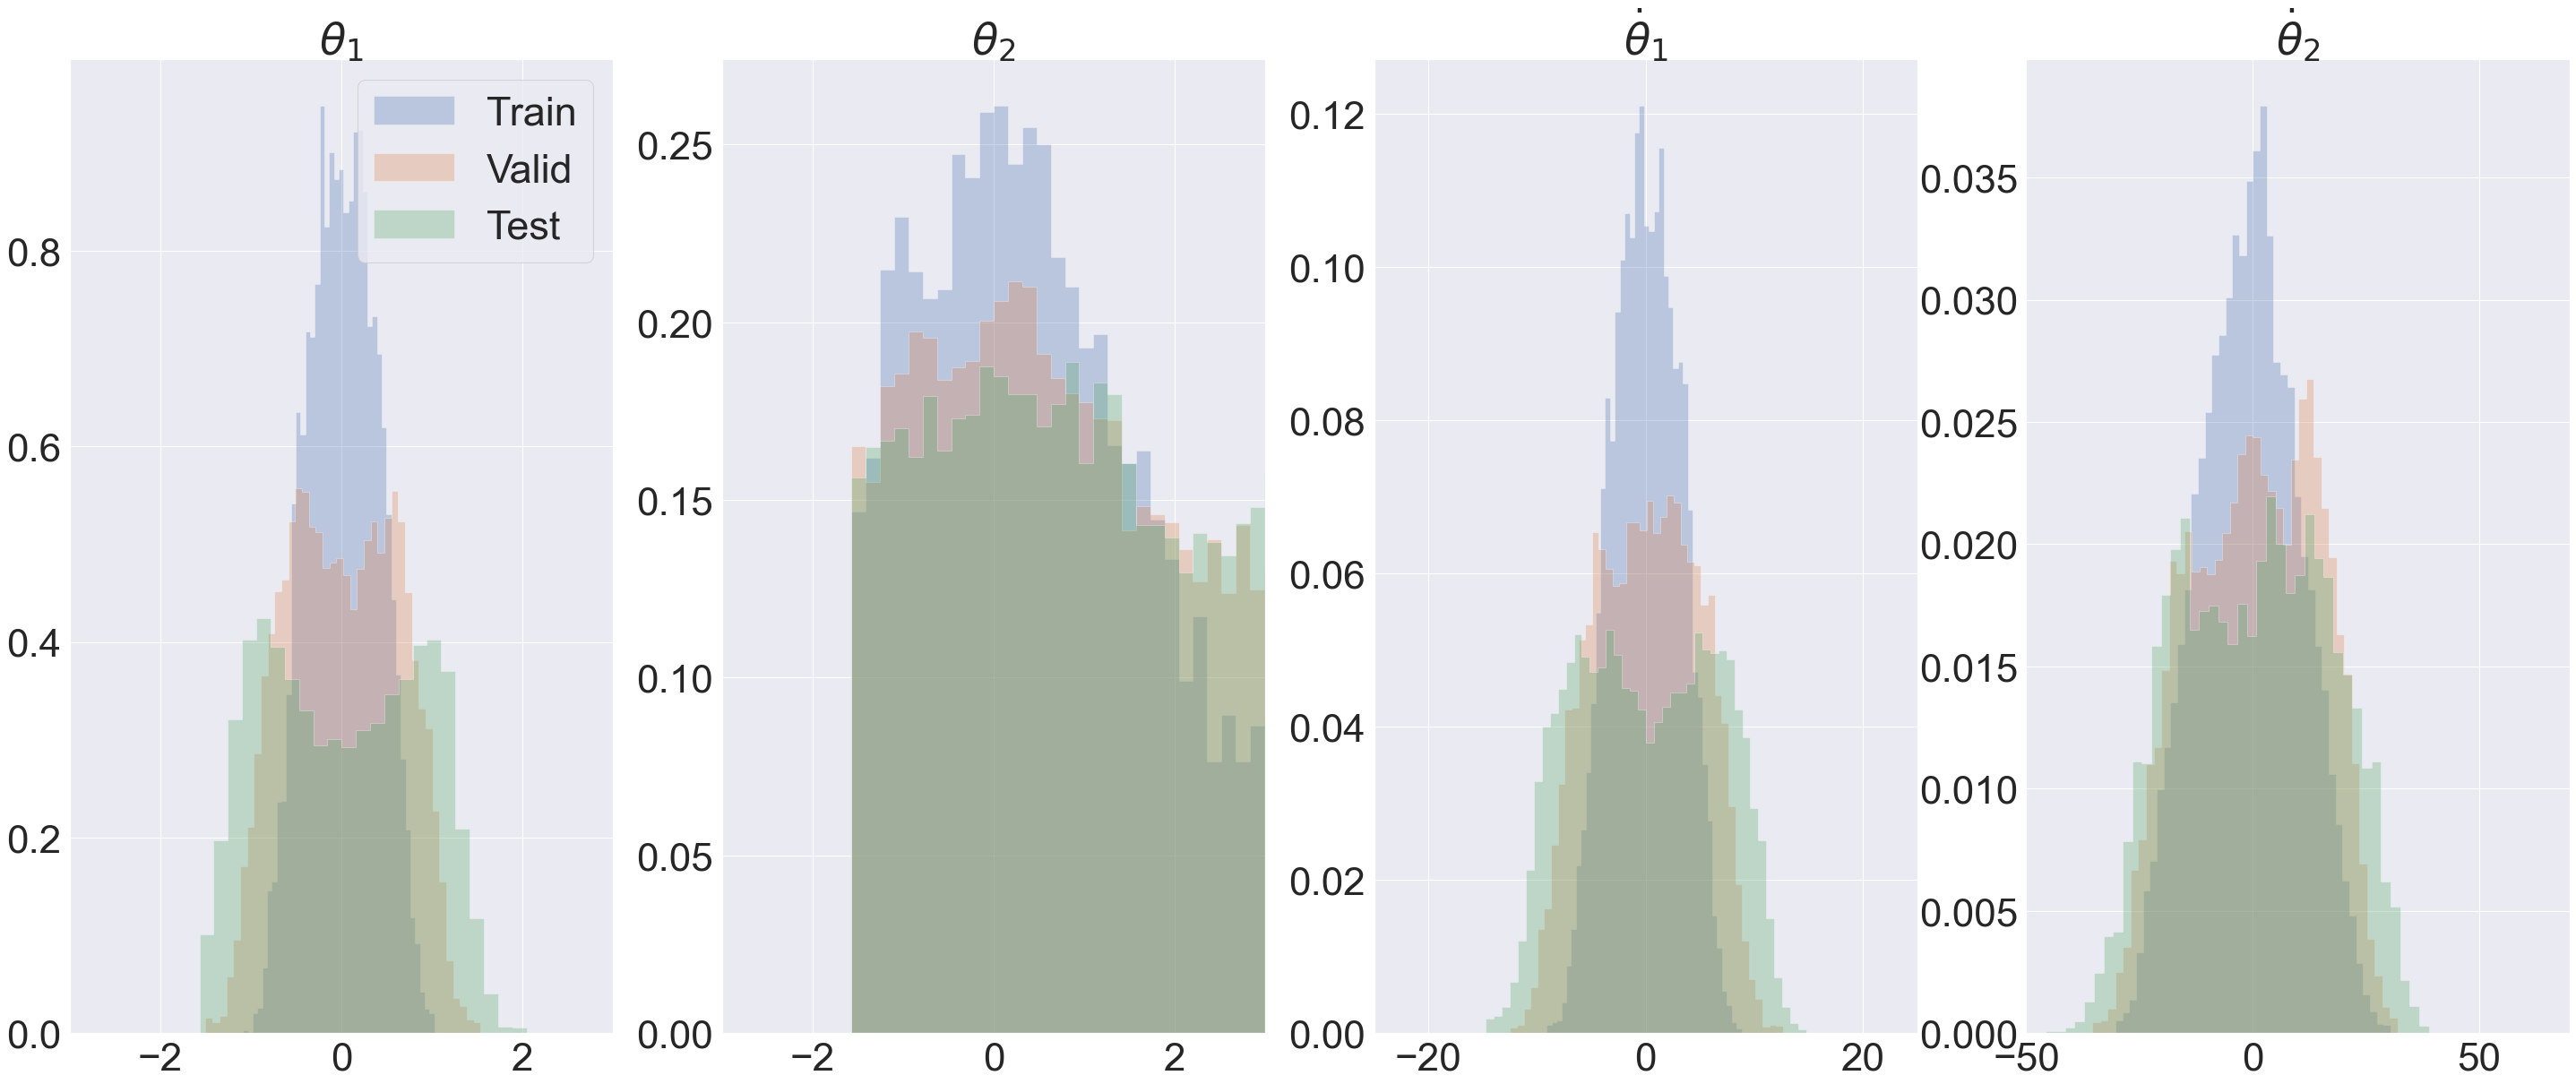

In [50]:
draw_speed_dist(x_train, x_test_shifted, x_valid)

In [30]:
omegas_train = get_omega(x_train)
init_state = torch.cat((x_train[:, 1, :], omegas_train), 1)
with open(r"init_state_train.pkl", "wb") as output_file:
    pickle.dump(init_state, output_file)

In [31]:
omegas_test = get_omega(x_test_shifted)
init_state = torch.cat((x_test_shifted[:, 1, :], omegas_test), 1)
with open(r"init_state_test.pkl", "wb") as output_file:
    pickle.dump(init_state, output_file)

In [33]:
omegas_train = get_omega(x_train)
init_state = [torch.cat((x_train[:, 1, :], omegas_train), 1)]

omegas_test = get_omega(x_test_shifted)
init_state.append(torch.cat((x_test_shifted[:, 1, :], omegas_test), 1))
omegas_valid = get_omega(x_valid)
init_state.append(torch.cat((x_valid[:, 1, :], omegas_valid), 1))
init_state = torch.cat(init_state, 0)
with open(r"init_state_all.pkl", "wb") as output_file:
    pickle.dump(init_state, output_file)